# Evaluating the Spaces with the MEN test set

In [5]:
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline



init_tc1_t3    = "outputs/MEN/vectors1929-init-tc1-t3"   # "our spaces"
noinit_tc1_t3  = "outputs/MEN/vectors1929-noinit-tc1-t3" # not corpus-wide initialized
init_tc0_t3    = "outputs/MEN/vectors1929-init-tc0-t3"   # not slice-specific counts
init_tc1_t1    = "outputs/MEN/vectors1929-init-tc1-t1"   # not structskip

init_tc0_t1    = "outputs/MEN/vectors1929-init-tc0-t1"   # only corpus-wide init
noinit_tc1_t1  = "outputs/MEN/vectors1929-noinit-tc1-t1" # only slice-specific counts
noinit_tc0_t3  = "outputs/MEN/vectors1929-noinit-tc0-t3" # only struct-skip

noalign_tc0_t3 = "outputs/MEN/vectors1929-noalign-tc0-t3" # also only structskip, but min count 5 (?)



selection = [init_tc1_t3, 
             noinit_tc1_t3, 
             init_tc0_t3, 
             init_tc1_t1, 
             
             #init_tc1_t1, 
             #init_tc0_t1, 
             #noinit_tc1_t1, 
             
             noalign_tc0_t3
            ]

names = [p.split("-")[-3]+"-"+p.split("-")[-2]+"-"+p.split("-")[-1] for p in selection]

In [2]:
def read_MEN_results(filepath):
    years = []
    instances = []
    rhos = []
    
    with open(filepath, "r") as f:
        f.readline() # useless header
        for line in f:
            line = line.rstrip().split()
            years.append(int(line[0]))
            instances.append(int(line[1]))
            rhos.append(float(line[2]))
    
    return DataFrame({"year":years, "instances":instances, "rho":rhos})    

In [3]:
dataframes = [read_MEN_results(file) for file in selection]

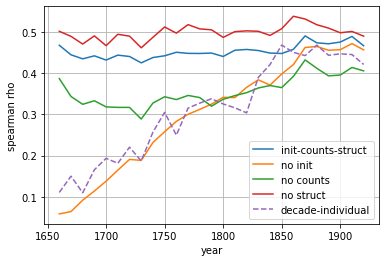

In [6]:
for i, df in enumerate(dataframes):
    if i == 4:
        plt.plot(df["year"],df["rho"], linestyle="--") # in order to distinguish the incremental from the non-incremental
    else:
        plt.plot(df["year"],df["rho"])

plt.grid()
plt.xlabel("year")
plt.ylabel("spearman rho")
#plt.legend(names)
plt.legend(["init-counts-struct", "no init", "no counts", "no struct", "decade-individual"])
#plt.savefig("visuals/MEN_evaluation_ablation_and_noalign.png", dpi=200)

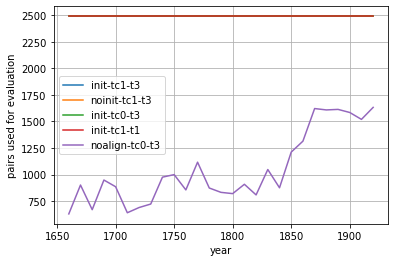

In [8]:
for df in dataframes:
    plt.plot(df["year"],df["instances"])

plt.xlabel("year")
plt.ylabel("pairs used for evaluation")
plt.legend(names)
plt.grid()